In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [10]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')

In [11]:
print (data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [12]:
# Display a description of the dataset
display(data.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


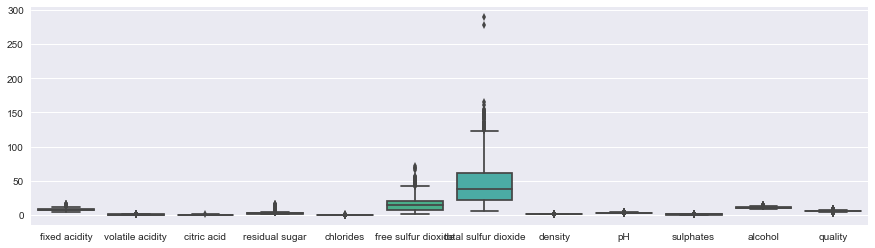

In [13]:
import matplotlib.pyplot as pl
import seaborn as sns

sns.set()
_, ax = pl.subplots(figsize=(15, 4))
sns.boxplot(data=data, ax=ax);

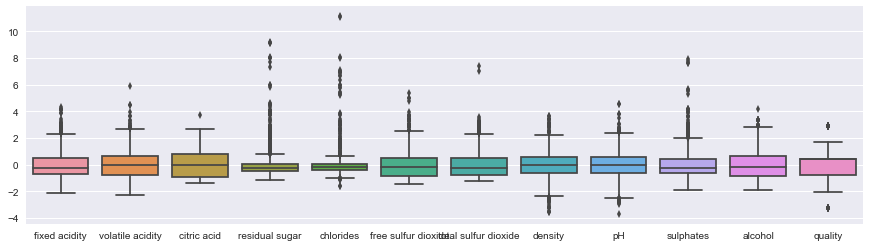

In [14]:
std_scale = preprocessing.StandardScaler()
data_std = std_scale.fit_transform(data)
data_std = pd.DataFrame(data_std, columns=data.columns)

_, ax = pl.subplots(figsize=(15, 4))
sns.boxplot(data=data_std, ax=ax)

In [15]:
from collections import Counter

# list of all outliers for all features that are to be removed
allOutliers=list()

for feature in data_std.keys():

    # 25th and 75th percentile of the data_std f
    Q1 = np.percentile(data_std[feature],25)
    Q3 = np.percentile(data_std[feature],75)
    step = 1.5*(Q3-Q1)

    # take all indices and concat here inside the for loop
    featureOutlier = data_std.index.values[~((data_std[feature] >= Q1 - step) & (data_std[feature] <= Q3 + step))]

    # convert ndarray to list for concatenation with list of all outliers 
    allOutliers = allOutliers + featureOutlier.tolist()

# after removing duplicates from the list
outliers  = list(set(allOutliers))

# Remove the outliers
good_data_std = data_std.drop(data_std.index[outliers]).reset_index(drop = True)
print (good_data_std.shape)

(1179, 12)


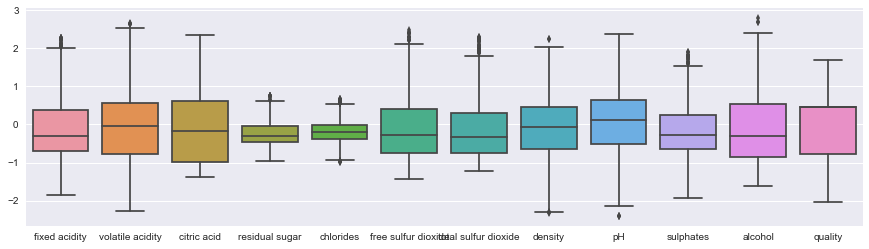

In [16]:
_, ax = pl.subplots(figsize=(15, 4))
sns.boxplot(data=good_data_std, ax=ax)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

y = good_data_std.quality
X = good_data_std.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)
clf=LinearRegression()
clf.fit(X_train, y_train) 
pred = clf.predict(X_test)
print('The R2 score using the LinearRegression {}.'.format(metrics.r2_score(y_test, pred)))
print('The mean squared error using the LinearRegression {}.'.format(metrics.mean_squared_error(y_test, pred)))
print()

n_estimators=25
clf=RandomForestRegressor(n_estimators)
clf.fit(X_train, y_train) 
pred = clf.predict(X_test)
print('RandomForestRegressor estimators:{}.'.format(n_estimators))
print('The R2 score using the RandomForestRegressor {}.'.format(metrics.r2_score(y_test, pred)))
print('The mean squared error using the RandomForestRegressor {}.'.format(metrics.mean_squared_error(y_test, pred)))


The R2 score using the LinearRegression 0.4138090521574139.
The mean squared error using the LinearRegression 0.46184162419168395.

RandomForestRegressor estimators:25.
The R2 score using the RandomForestRegressor 0.5084334545454546.
The mean squared error using the RandomForestRegressor 0.38728999925121216.


In [18]:
n_estimators=100
clf=RandomForestRegressor(n_estimators)
clf.fit(X_train, y_train) 
pred = clf.predict(X_test)
print('RandomForestRegressor estimators:{}.'.format(n_estimators))
print('The R2 score using the RandomForestRegressor {}.'.format(metrics.r2_score(y_test, pred)))
print('The mean squared error using the RandomForestRegressor {}.'.format(metrics.mean_squared_error(y_test, pred)))

RandomForestRegressor estimators:100.
The R2 score using the RandomForestRegressor 0.5228764895104896.
The mean squared error using the RandomForestRegressor 0.3759107810100252.


In [19]:
n_estimators=200
clf=RandomForestRegressor(n_estimators)
clf.fit(X_train, y_train) 
pred = clf.predict(X_test)
print('RandomForestRegressor estimators:{}.'.format(n_estimators))
print('The R2 score using the RandomForestRegressor {}.'.format(metrics.r2_score(y_test, pred)))
print('The mean squared error using the RandomForestRegressor {}.'.format(metrics.mean_squared_error(y_test, pred)))

RandomForestRegressor estimators:200.
The R2 score using the RandomForestRegressor 0.5213171153846159.
The mean squared error using the RandomForestRegressor 0.37713936340568754.


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

rfr=RandomForestRegressor()

param_grid = { 
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 450, num = 5)],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap' : [True, False],
    'max_features': ['auto', 'sqrt', 'log2']
}


clf = RandomizedSearchCV(estimator=rfr, param_distributions=param_grid, cv=5)
 
clf.fit(X_train, y_train) 
pred = clf.predict(X_test)
print (clf.best_params_)

print('The R2 score using the RandomForestRegressor {}.'.format(metrics.r2_score(y_test, pred)))
print('The mean squared error using the RandomForestRegressor {}.'.format(metrics.mean_squared_error(y_test, pred)))


print('Mean Test Score {}.'.format(clf.cv_results_["mean_test_score"]))
print('Standard Deviation of Test Score {}.'.format(clf.cv_results_["std_test_score"]))

{'n_estimators': 350, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}
The R2 score using the RandomForestRegressor 0.5125918327941901.
The mean squared error using the RandomForestRegressor 0.38401374230547186.
Mean Test Score [ 0.40590034  0.44036907  0.44397976  0.40858098  0.43097553  0.4317356
  0.40858543  0.41542144  0.44635509  0.41196963].
Standard Deviation of Test Score [ 0.08922285  0.06364107  0.06398351  0.07747605  0.08591412  0.06380784
  0.07993427  0.07081814  0.06622419  0.06825561].


In [50]:
print('Average of Mean Test Scores {}.'.format(np.mean(clf.cv_results_["mean_test_score"])))
print('Average of Standard Deviation of Test Score {}.'.format(np.mean(clf.cv_results_["std_test_score"])))

Average of Mean Test Scores 0.42438728859203784.
Average of Standard Deviation of Test Score 0.07292776490740523.


RandomForestRegressor estimators:250.
The R2 score using the RandomForestRegressor 0.5241875602797207.
The mean squared error using the RandomForestRegressor 0.37487782910976053.
Feature ranking:
1. feature 10 (0.266031)
2. feature 9 (0.159515)
3. feature 1 (0.088043)
4. feature 6 (0.082122)
5. feature 4 (0.070131)
6. feature 7 (0.067077)
7. feature 2 (0.063214)
8. feature 8 (0.059215)
9. feature 0 (0.051947)
10. feature 5 (0.049192)
11. feature 3 (0.043513)


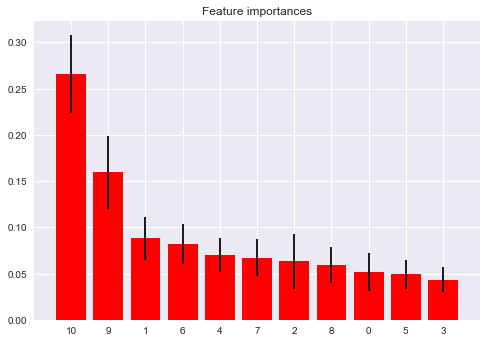

In [39]:
n_estimators=250
clf=RandomForestRegressor(n_estimators)
clf.fit(X_train, y_train) 
pred = clf.predict(X_test)
print('RandomForestRegressor estimators:{}.'.format(n_estimators))
print('The R2 score using the RandomForestRegressor {}.'.format(metrics.r2_score(y_test, pred)))
print('The mean squared error using the RandomForestRegressor {}.'.format(metrics.mean_squared_error(y_test, pred)))

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
pl.figure()
pl.title("Feature importances")
pl.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
pl.xticks(range(X.shape[1]), indices)
pl.xlim([-1, X.shape[1]])
pl.show()